# Online Payment fraud detection

## Description project

We detect the fraudulent transactions from the Paysim dataset. We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.

## Scope of work

Construct an anomaly detection model to detect fraud case presented in the data and then build a Machine Learning prediction model allowing to categorise a transaction as fraudulent or safe.
Elaborate on how the model works for a non technical audience who wants to be comfortable using the model.

To complete the work, we were provided with a stimulated datasets.




In [ ]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import calendar
import warnings
warnings.filterwarnings('ignore')


In [11]:
# Function for when we want to drop a column but still keep it in memory in an other dataframe

def to_recycle_bin(column) :
    recycle_ds[column] = dataset[column]
    dataset.drop(column, axis=1, inplace = True)
    
# Function to get a column back from recycle_ds

def restore_from_bin(column) :
    dataset[column] = dataset[column]
    recycle_ds.drop(column, axis=1, inplace = True)

# First we import the data



In [81]:
dataset = pd.read_csv('creditcardcsvpresent.csv.xls')
dataset = dataset.drop(columns = ['isFradulent'])

## Data Understanding

In [82]:
dataset.head()


,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6


In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 264.4+ KB


In [84]:
dataset.shape


(3075, 11)

In [85]:
dataset = dataset.drop(columns=['Transaction date'])

In [86]:
dataset.dtypes

Merchant_id                         int64
Average Amount/transaction/day    float64
Transaction_amount                float64
Is declined                        object
Total Number of declines/day        int64
isForeignTransaction               object
isHighRiskCountry                  object
Daily_chargeback_avg_amt            int64
6_month_avg_chbk_amt              float64
6-month_chbk_freq                   int64
dtype: object

## Exploratory Data Analysis


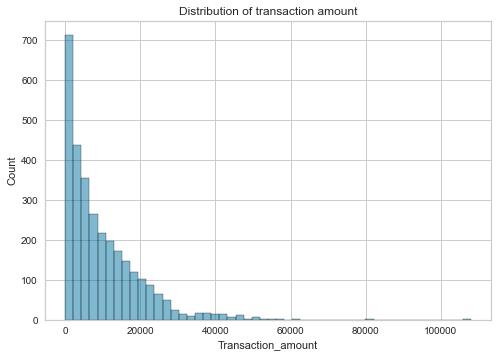

In [87]:
plt.figure()
sns.histplot(x='Transaction_amount',data=dataset,bins=50,alpha=0.5)
plt.title('Distribution of transaction amount');



From the distribution of transaction amount there are some outlier amounts which is higher than 60000. This high amount may represent the anomaly.

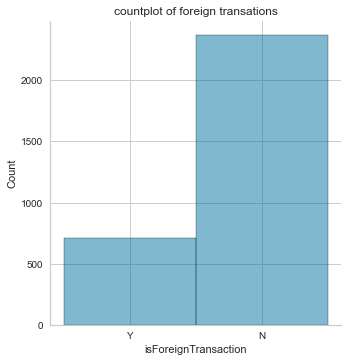

In [88]:

sns.displot(x='isForeignTransaction',data=dataset,bins=50,alpha=0.5)
plt.title('countplot of foreign transations');

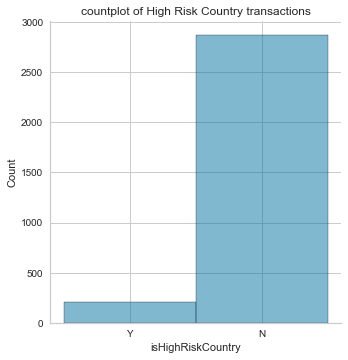

In [89]:
sns.displot(x='isHighRiskCountry',data=dataset,bins=50,alpha=0.5)
plt.title('countplot of High Risk Country transactions');

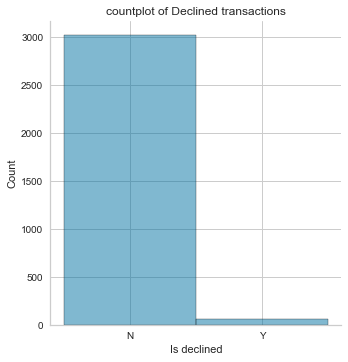

In [90]:
sns.displot(x='Is declined',data=dataset,alpha=0.5)
plt.title('countplot of Declined transactions');

From above plots, in the dataset Foriegn transactions, Risk Countries and Declined transactions are very less compared to its counter parts.

## Anomaly Detection

Now we will detect the anomalies presented in the dataset

## Benfords Law
Benford’s Law, also called first-digit law, is an observation about the frequency distribution of leading digit in many real-life sets of numeric data (quoted from Wikipedia). With a big set of data or column value, Benford’s Law tell us the first digit appearance is followed by some rules and probability. Therefore, if the result of count/ frequency has some deviation from the Benford’s Law, there is a higher possibilities of manipulation.


[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.40365, Tstat=8.31148


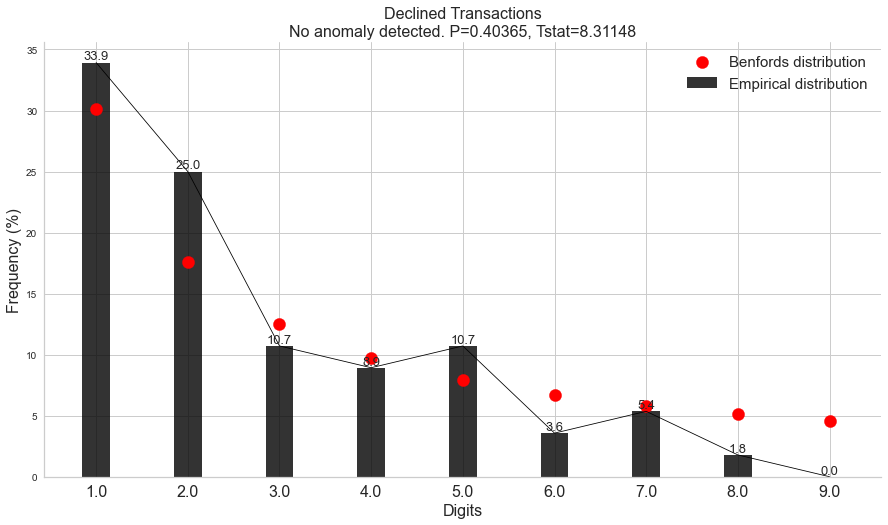

In [91]:
from benfordslaw import benfordslaw

# Initialize
bl = benfordslaw(alpha=0.05)

# Extract election information.
declined = dataset['Transaction_amount'].loc[dataset['Is declined']=='Y'].values

# Print
#print(X)
# array([ 5387, 23618,  1710, ...,    16,    21,     0], dtype=int64)

# Make fit
results = bl.fit(declined)

# Plot
bl.plot(title='Declined Transactions');

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0.0033237, Tstat=23.0318


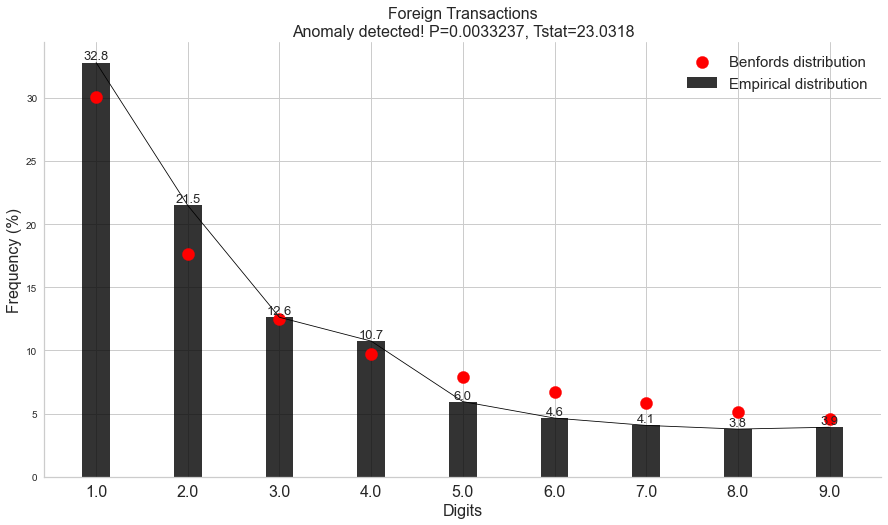

In [92]:
foreign = dataset['Transaction_amount'].loc[dataset['isForeignTransaction']=='Y'].values

# Print
#print(X)
# array([ 5387, 23618,  1710, ...,    16,    21,     0], dtype=int64)

# Make fit
results_foreign = bl.fit(foreign)

# Plot
bl.plot(title='Foreign Transactions');

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=1.31045e-05, Tstat=36.6932


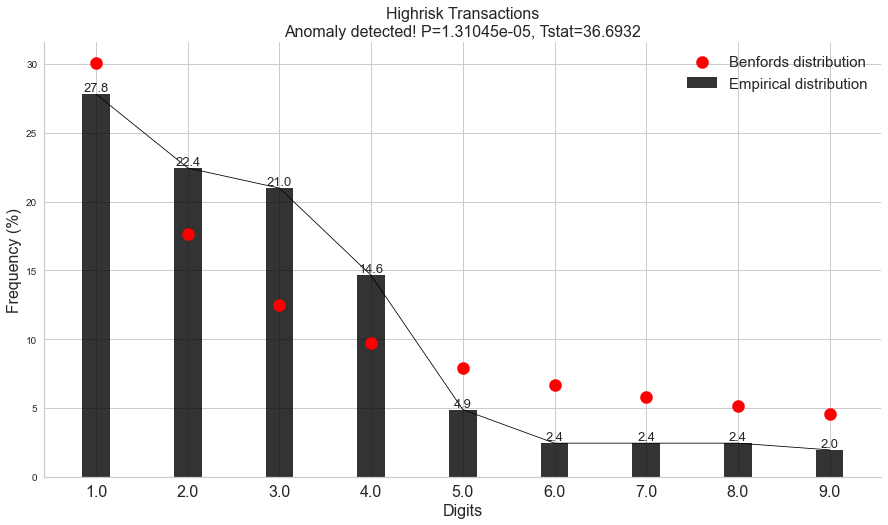

In [93]:
highrisk = dataset['Transaction_amount'].loc[dataset['isHighRiskCountry']=='Y'].values

# Print
#print(X)
# array([ 5387, 23618,  1710, ...,    16,    21,     0], dtype=int64)

# Make fit
results_foreign = bl.fit(highrisk)

# Plot
bl.plot(title='Highrisk Transactions');

From the above plots benfordslaw detected anomaly for Highrisk country transactions and Foreign transactions but no anomalies for declined transaction.

Now we will model the dataset to find the anomalies.

In [35]:
from pycaret.anomaly import *

In [94]:
model = setup(dataset)

,Description,Value
0,session_id,2729
1,Original Data,"(3075, 10)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,5
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(3075, 32)"
9,CPU Jobs,-1


In [95]:
iforest = create_model(model = 'iforest')

In [96]:
plot_model(iforest)

In [97]:
knn = create_model(model = 'knn')
plot_model(knn)

In [98]:
svm = create_model(model = 'svm')
plot_model(svm)

In [75]:
cluster = create_model(model = 'cluster')
plot_model(cluster)

In [99]:
tuned_iforest = tune_model(iforest,supervised_target='Transaction_amount')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0.0,5925.0332,75071960.2604,7922.3536,0.1085,1.8562,1.8533
0.01,5731.9475,70167652.5305,7607.9094,0.1430,1.8239,1.7392
0.02,5601.7628,66667557.5672,7424.4515,0.1535,1.8297,1.7072
0.03,5557.3304,65557846.6890,7329.9220,0.1673,1.8159,1.7267
0.04,5530.0521,64968617.5702,7267.8323,0.1671,1.8146,1.6897
0.05,5473.3097,63663278.6767,7155.2658,0.1698,1.8170,1.6719
0.06,5351.0302,61017823.6708,6996.1980,0.1874,1.8171,1.6562
0.07,5293.5189,59954696.8568,6871.9997,0.1995,1.8242,1.6424
0.08,5210.3844,57486356.2575,6767.7792,0.2116,1.8221,1.6475
0.09,5043.3938,52885713.1910,6558.6219,0.2536,1.8253,1.6271


In [100]:
anomaly_df = assign_model(iforest)

In [101]:
anomaly_df

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,Anomaly,Anomaly_Score
0,3160040998,100.0,3000.0,N,5,Y,Y,0,0.0,0,0,-0.000496
1,3160040998,100.0,4300.0,N,5,Y,Y,0,0.0,0,1,0.000222
2,3160041896,185.5,4823.0,Y,5,N,N,0,0.0,0,1,0.001105
3,3160141996,185.5,5008.5,Y,8,N,N,0,0.0,0,1,0.009606
4,3160241992,500.0,26000.0,N,0,Y,Y,800,677.2,6,1,0.053616
...,...,...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,500.0,11000.0,Y,0,N,N,754,585.0,7,1,0.046036
3071,6661273532,800.0,0.0,Y,0,N,N,754,585.0,7,1,0.052764
3072,6661273533,800.0,20800.0,Y,0,N,N,754,585.0,7,1,0.058880
3073,6661273532,1500.0,12000.0,Y,0,Y,Y,754,585.0,7,1,0.111445


In [102]:
anomaly_df.Anomaly.value_counts()

0    2921
1     154
Name: Anomaly, dtype: int64

After comparing Knn,iforest,svm and cluster models for anomaly detection. Selected the iforest model as the final model and assigned model to make new dataframe with anomaly column. No we will use this columns for classifying whether a transaction is fradulent or not for future detection of frauds<


In [103]:
from pycaret.classification import *

In [107]:
anomaly = setup(anomaly_df,target='Anomaly',fix_imbalance=True)

,Description,Value
0,session_id,3093
1,Target,Anomaly
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3075, 12)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


Balanced the imbalanced data with SMOTE method.

In [109]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2140
dt,Decision Tree Classifier,0.9995,0.9998,1.0000,0.9917,0.9957,0.9954,0.9955,0.0290
ada,Ada Boost Classifier,0.9995,0.9998,1.0000,0.9917,0.9957,0.9954,0.9955,0.0350
gbc,Gradient Boosting Classifier,0.9995,0.9998,1.0000,0.9917,0.9957,0.9954,0.9955,0.2520
xgboost,Extreme Gradient Boosting,0.9995,0.9998,1.0000,0.9917,0.9957,0.9954,0.9955,0.1720
catboost,CatBoost Classifier,0.9995,1.0000,1.0000,0.9917,0.9957,0.9954,0.9955,5.0790
rf,Random Forest Classifier,0.9991,1.0000,0.9909,0.9917,0.9909,0.9904,0.9906,0.2170
et,Extra Trees Classifier,0.9902,0.9986,0.9273,0.8946,0.9079,0.9027,0.9044,0.1850
ridge,Ridge Classifier,0.9415,0.0000,0.9727,0.4739,0.6359,0.6085,0.6558,0.0280
lda,Linear Discriminant Analysis,0.9373,0.9891,0.9818,0.4579,0.6225,0.5937,0.6462,0.0410


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3093, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [116]:
LGBM = create_model('lightgbm')     #model='lightgbm', target = 'Anomaly',estimator='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [120]:
#plot_model(LGBM,plot='auc')

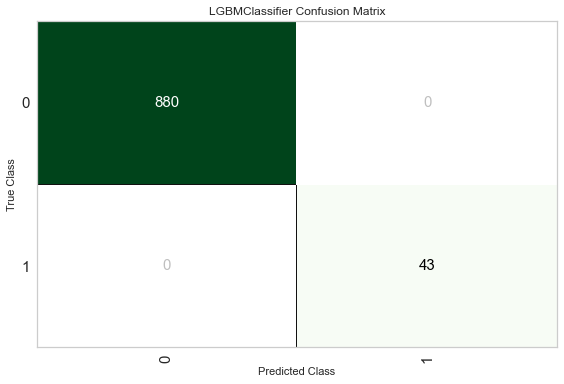

In [118]:
plot_model(LGBM,plot='confusion_matrix')

Surprisingly the model could classify all the labels correctly with 100% accuracy.